In [3]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)

4.1.2


# 使用cv2的空間轉換及numpy的slicing做rgb/bgr轉換

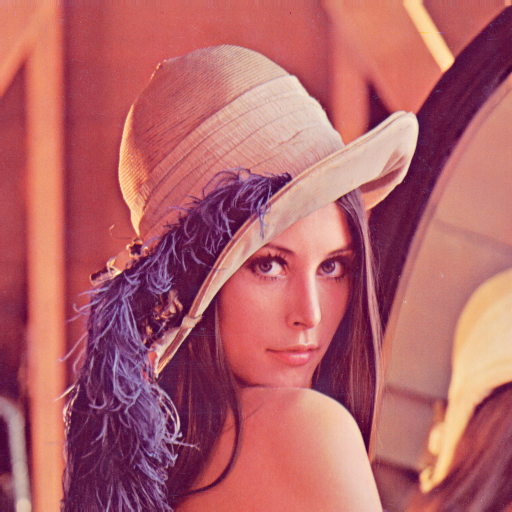

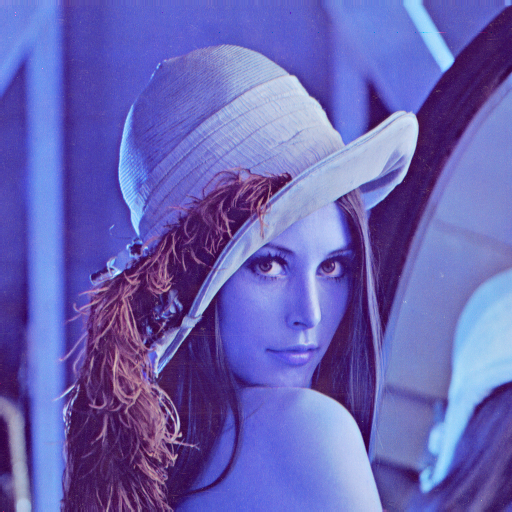

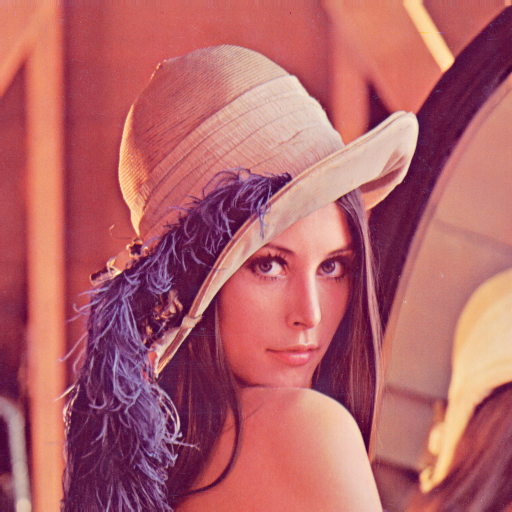

In [15]:
lena=cv2.imread("lenacolor.png")
rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
cv2_imshow(lena)
cv2_imshow(rgb)
cv2_imshow(rgb[:,:,::-1])


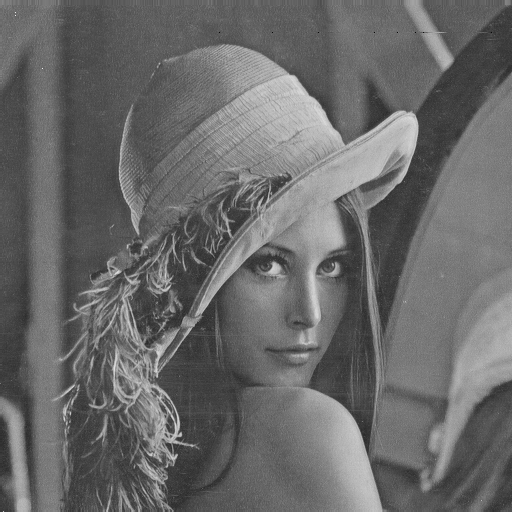

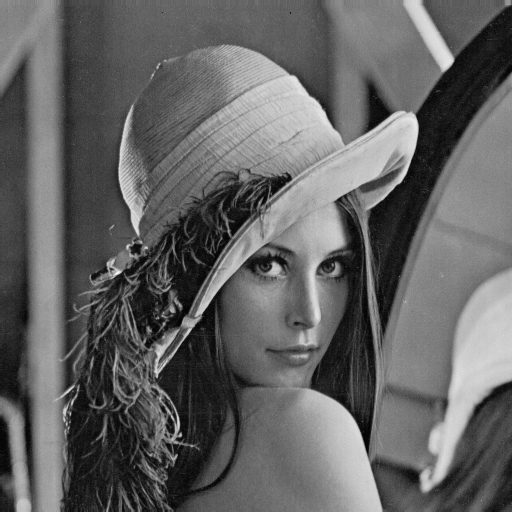

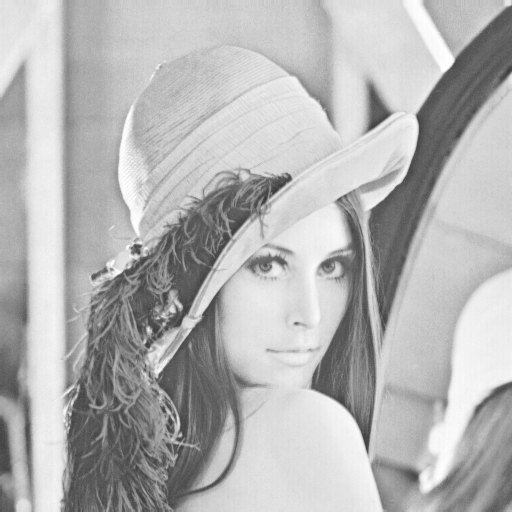

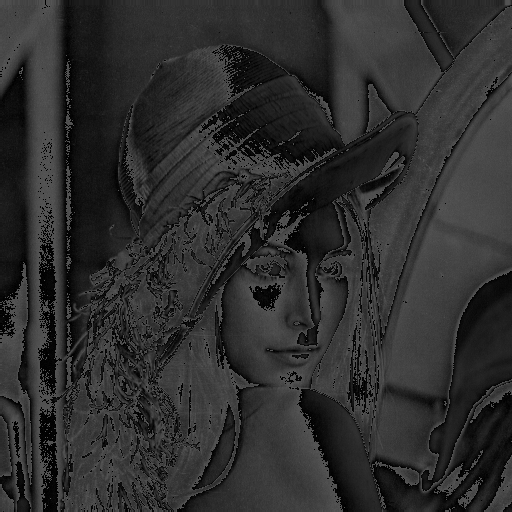

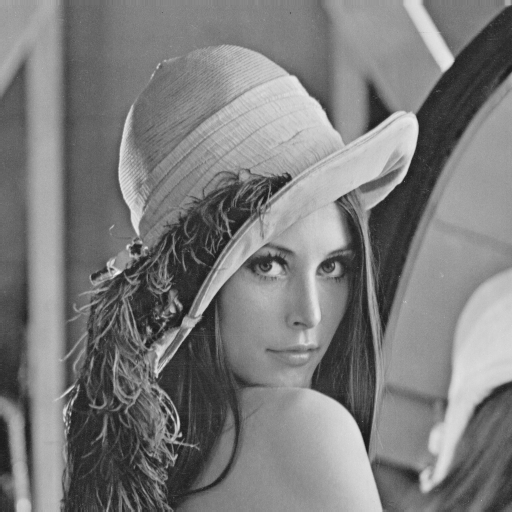

In [16]:
lena = cv2.imread("lenacolor.png")
b,g,r = cv2.split(lena)
gray = (b + g + r) / 3
gray2 = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
cv2_imshow(gray)
cv2_imshow(gray2)

In [17]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(len(flags))
print(*flags,sep='\n')

274
COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_C

# 利用HSV方式做顏色過濾

[[[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]

 [[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]

 [[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]

 ...

 [[ 0  0 12]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  1]]

 [[ 0  0 12]
  [ 0  0  0]
  [ 0  0  1]
  ...
  [ 0  0  1]
  [ 0  0  0]
  [ 0  0  1]]

 [[ 0  0 13]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  2]]]


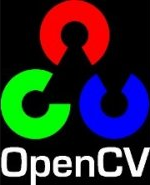

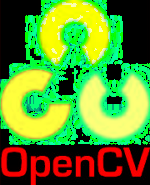

In [18]:
opencv=cv2.imread("opencv_logo.png")
hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV)
print(hsv)
cv2_imshow(opencv)
cv2_imshow(hsv)



In [19]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)


[[[ 60 255 255]]]


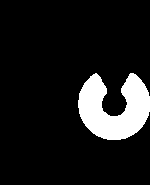

In [20]:
#=============指定藍色值的範圍=============
minBlue = np.array([110,50,50])
maxBlue = np.array([130,255,255])
#確定藍色區域
mask = cv2.inRange(hsv, minBlue, maxBlue)
cv2_imshow(mask)

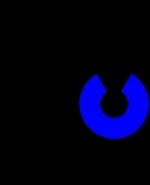

In [21]:
#透過隱藏控制的逐位元與運算，鎖定藍色區域
blue = cv2.bitwise_and(opencv,opencv, mask= mask)
cv2_imshow(blue)

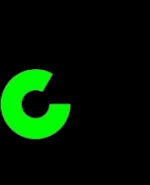

In [22]:
#=============指定綠色值的範圍=============
minGreen = np.array([50,50,50])
maxGreen = np.array([70,255,255])
#確定綠色區域
mask = cv2.inRange(hsv, minGreen, maxGreen)
#透過隱藏控制的逐位元與運算，鎖定綠色區域
green = cv2.bitwise_and(opencv,opencv, mask= mask)
cv2_imshow(green)

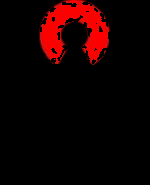

In [23]:
#=============指定紅色值的範圍=============
minRed = np.array([0,50,50])
maxRed = np.array([30,255,255])
#確定紅色區域
mask = cv2.inRange(hsv, minRed, maxRed)
#透過隱藏控制的逐位元與運算，鎖定紅色區域
red= cv2.bitwise_and(opencv,opencv, mask= mask)
cv2_imshow(red)

# opencv的bgra顯示


In [24]:
img=cv2.imread("lenacolor.png")
bgra = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
b,g,r,a=cv2.split(bgra)
print(bgra.shape)
a[:,:]=200
bgra125=cv2.merge([b,g,r,a])
a[:,:]=0
bgra0=cv2.merge([b,g,r,a])
cv2_imshow(img)
cv2_imshow(bgra)
cv2_imshow(bgra125)
cv2_imshow(bgra0)
#cv2.imwrite("bgra.png", bgra)
#cv2.imwrite("bgra125.png", bgra125)
#cv2.imwrite("bgra0.png", bgra0)


Output hidden; open in https://colab.research.google.com to view.

TypeError: ignored

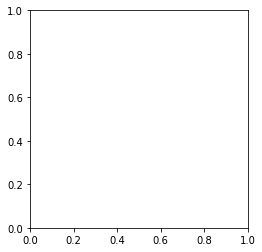

In [25]:
nemo = cv2.imread('nemo0.jpg')
plt.imshow(nemo)
plt.show()

In [26]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

error: ignored

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

ValueError: ignored

In [30]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

error: ignored

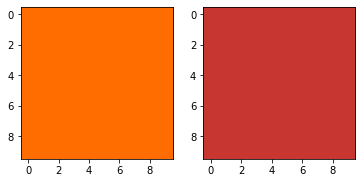

In [29]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [31]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

NameError: ignored

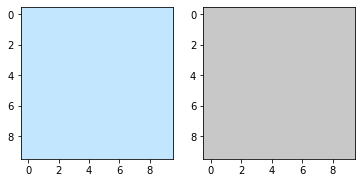

In [32]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lo_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [33]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

NameError: ignored

In [34]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

NameError: ignored

In [35]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

NameError: ignored